In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Percorso del file CSV
file_path = 'train.csv'

# Caricamneto dei dati nel DataFrame
macchine_data = pd.read_csv(file_path)

In [ ]:
#le prime righe del DataFrame per confermare
print(macchine_data.head())

   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T  

In [ ]:
print(macchine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None


In [ ]:
print(macchine_data['accident'].unique())

['None reported' 'At least 1 accident or damage reported' nan]


In [ ]:
print(macchine_data['clean_title'].unique())

['Yes' nan]


In [ ]:
#conta valori nulli per ogni colonna
null_counts = macchine_data.isnull().sum()
print(null_counts)

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [ ]:
print(macchine_data['price'].describe())

count    1.885330e+05
mean     4.387802e+04
std      7.881952e+04
min      2.000000e+03
25%      1.700000e+04
50%      3.082500e+04
75%      4.990000e+04
max      2.954083e+06
Name: price, dtype: float64


In [ ]:
print(macchine_data['milage'].describe())

count    188533.000000
mean      65705.295174
std       49798.158076
min         100.000000
25%       24115.000000
50%       57785.000000
75%       95400.000000
max      405000.000000
Name: milage, dtype: float64


Text(0.5, 1.0, 'Distribuzione del prezzo delle macchine')

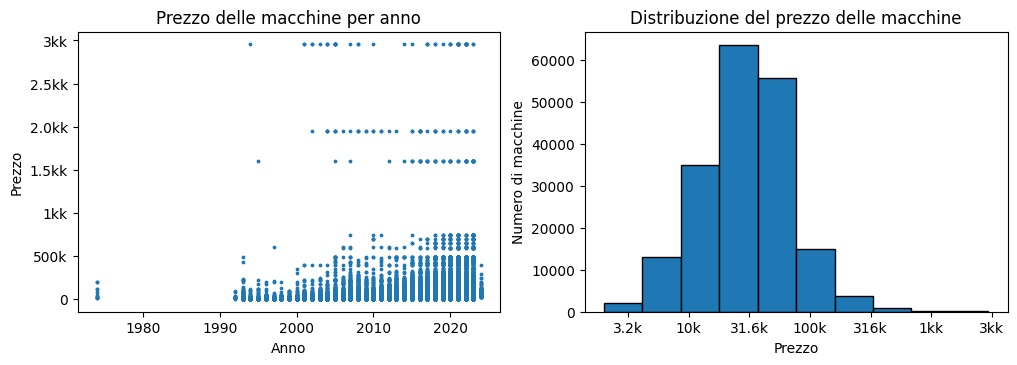

In [ ]:
fig = plt.figure(figsize= (12, 8))

ax1 = fig.add_subplot(2,2,1)
ax1.scatter(macchine_data['model_year'], macchine_data['price'], s = 3)
tick_positions = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
tick_positions = [x*1e6 for x in tick_positions]
tick_labels = ['0', '500k', '1kk', '1.5kk', '2.0kk', '2.5kk', '3kk']
ax1.set_yticks(tick_positions, tick_labels)
ax1.set_title('Prezzo delle macchine per anno')
ax1.set_xlabel('Anno')
ax1.set_ylabel('Prezzo')
ax2 = fig.add_subplot(2,2,2)
ax2.hist(np.log10(macchine_data['price']), edgecolor='black')
tick_positions = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
tick_labels = ['3.2k', '10k', '31.6k', '100k', '316k', '1kk', '3kk']
ax2.set_xticks(tick_positions, tick_labels)
ax2.set_xlabel('Prezzo')
ax2.set_ylabel('Numero di macchine')
ax2.set_title('Distribuzione del prezzo delle macchine')


Text(0, 0.5, 'Prezzo medio')

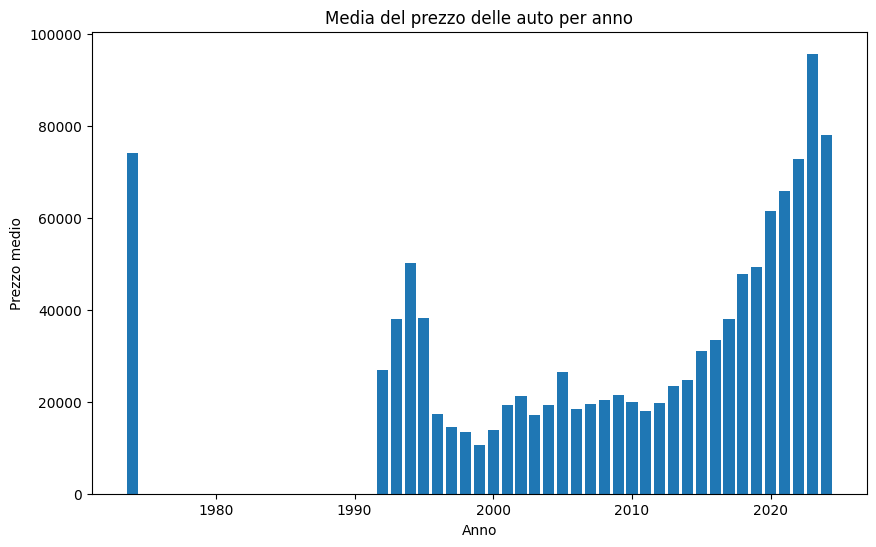

In [ ]:
media_annuale = macchine_data.groupby('model_year')['price'].mean()

#std_annuale = macchine_data.groupby('model_year')['price'].std()

# print(media_annuale)

fig2 = plt.figure(figsize=(10, 6))

ax3 = fig2.add_subplot(1,1,1)

ax3.bar(media_annuale.index, media_annuale.values)

ax3.set_title('Media del prezzo delle auto per anno')
ax3.set_xlabel('Anno')
ax3.set_ylabel('Prezzo medio')

Text(0, 0.5, 'Prezzo medio')

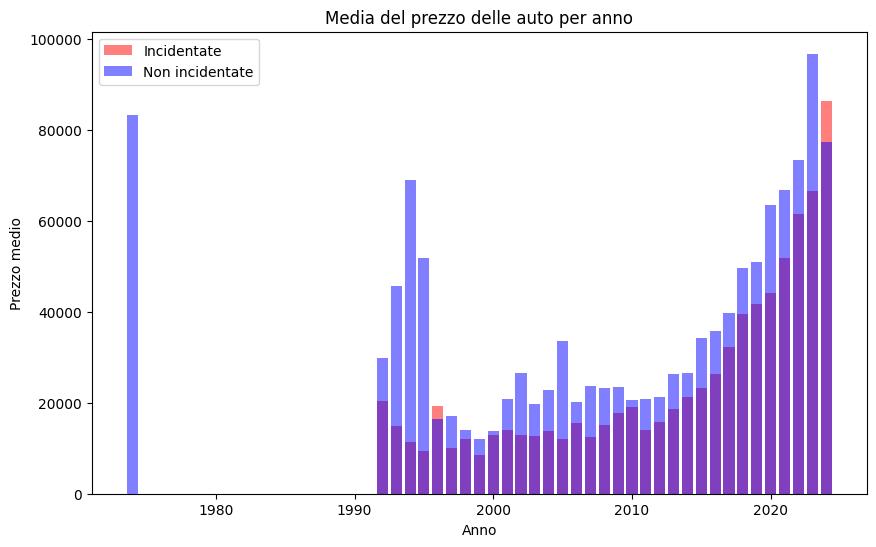

In [ ]:
media_annuale = macchine_data.groupby('model_year')['price'].mean()
media_annuale_incidentate = macchine_data[macchine_data["accident"] == "At least 1 accident or damage reported"].groupby('model_year')['price'].mean()
media_annuale_non_incidentate = macchine_data[macchine_data["accident"] == "None reported"].groupby('model_year')['price'].mean()


fig2 = plt.figure(figsize=(10, 6))

ax3 = fig2.add_subplot(1,1,1)



ax3.bar(media_annuale_incidentate.index, media_annuale_incidentate.values, label='Incidentate', color='red', alpha=0.5)
ax3.bar(media_annuale_non_incidentate.index, media_annuale_non_incidentate.values, label='Non incidentate', color='blue', alpha=0.5)

ax3.legend()
ax3.set_title('Media del prezzo delle auto per anno')
ax3.set_xlabel('Anno')
ax3.set_ylabel('Prezzo medio')

In [ ]:
#creare colonna per kilometri partendo dalla colonna miglia
macchine_data['Kilometri'] = macchine_data['milage'] * 1.60934

/var/folders/xx/f3mw_zd11yv2thln0zygp7hc0000gn/T/ipykernel_1919/1731889680.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kilometraggio_range = macchine_data.groupby('Kilometraggio').agg(
/var/folders/xx/f3mw_zd11yv2thln0zygp7hc0000gn/T/ipykernel_1919/1731889680.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(indici, rotation=90, size=10)


[Text(0, 0, '[150, 50150)'),
 Text(1, 0, '[50150, 100150)'),
 Text(2, 0, '[100150, 150150)'),
 Text(3, 0, '[150150, 200150)'),
 Text(4, 0, '[200150, 250150)'),
 Text(5, 0, '[250150, 300150)'),
 Text(6, 0, '[300150, 350150)'),
 Text(7, 0, '[350150, 400150)'),
 Text(8, 0, '[400150, 450150)'),
 Text(9, 0, '[450150, 500150)'),
 Text(10, 0, '[500150, 550150)'),
 Text(11, 0, '[550150, 600150)'),
 Text(12, 0, '[600150, 650150)')]

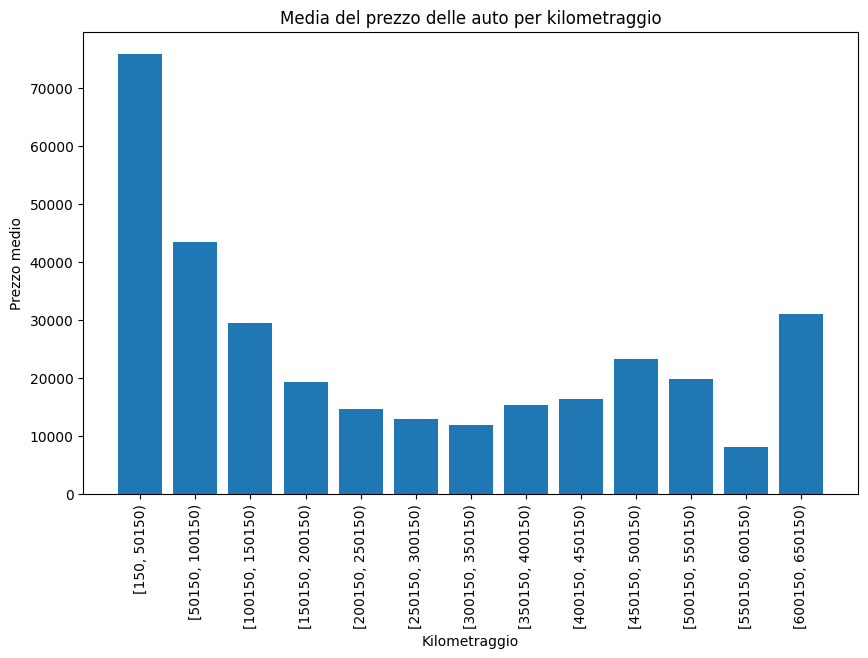

In [ ]:
macchine_data['Kilometraggio'] = pd.cut(macchine_data['Kilometri'], bins=range(150, 660000, 50000), right=False)

kilometraggio_range = macchine_data.groupby('Kilometraggio').agg(
Price=('price', 'mean'),
)

fig2 = plt.figure(figsize=(10, 6))

ax3 = fig2.add_subplot(1,1,1)

indici = []

for index, row in kilometraggio_range.iterrows():
    indici.append(str(row.name))

ax3.bar(indici, kilometraggio_range.Price.values)

ax3.set_title('Media del prezzo delle auto per kilometraggio')
ax3.set_xlabel('Kilometraggio')
ax3.set_ylabel('Prezzo medio')
ax3.set_xticklabels(indici, rotation=90, size=10)




Text(0, 0.5, 'Prezzo medio')

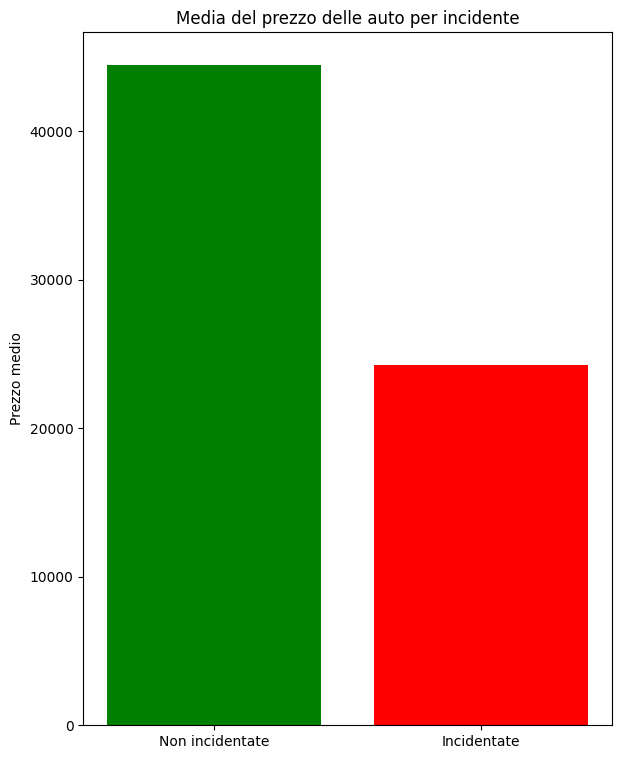

In [ ]:
media_incidentate = macchine_data.groupby('accident')['price'].mean()


fig2 = plt.figure(figsize=(15, 9))

ax4 = fig2.add_subplot(1,2,2)

ax4.bar(media_incidentate.index, media_incidentate.values, color = ['green','red'] )
ax4.set_title('Media del prezzo delle auto per incidente')
tick_positions = [0,1]
tick_labels = ['Non incidentate', 'Incidentate']
ax4.set_xticks(tick_positions, tick_labels)
ax4.set_ylabel('Prezzo medio')



In [ ]:
for index in range(len(macchine_data)):
    if 'HP' in macchine_data.loc[index,'engine']:
     #if macchine_data.loc[index,'engine'].split(' ')[0][0].isdigit():
      macchine_data.loc[index,'Hp'] = macchine_data.loc[index,'engine'].split('HP')[0]
    

#print(macchine_data['Hp'].unique())

In [ ]:
macchine_data[macchine_data['Hp'] == ''] = 0
macchine_data['Hp'] = macchine_data['Hp'].astype(float)

#macchine_data['Hp'] = macchine_data['Hp'].astype(float)

In [ ]:
# Drop unnecessary columns


#macchine_data = macchine_data.drop(['id','brand','model','fuel_type','engine','transmission','ext_col','int_col','Kilometraggio'], axis=1)

macchine_data['clean_title'] = macchine_data['clean_title'].map({'Yes': 1, np.nan: 0})

#macchine_data['accident'] = macchine_data['accident'].dropna()

macchine_data.dropna(subset=['accident'], inplace=True)
macchine_data.dropna(subset=['Hp'], inplace=True)

macchine_data['accident'] = macchine_data['accident'].map({'At least 1 accident or damage reported': 1, 'None reported': 0})



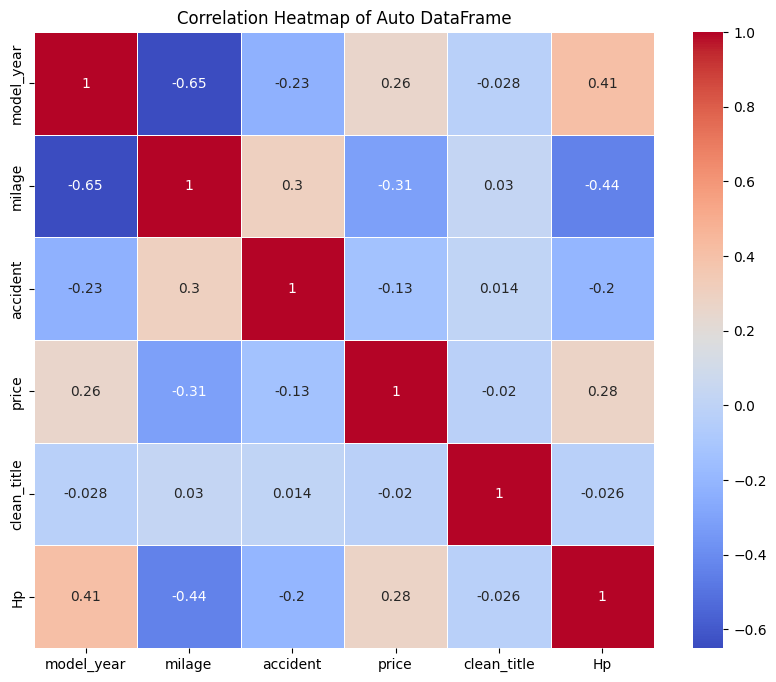

In [ ]:
# Compute correlation matrix
lista = ['model_year', 'milage','accident', 'price', 'clean_title', 'Hp']
corr = macchine_data[lista].corr()

# Plotting Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Auto DataFrame')
plt.show()


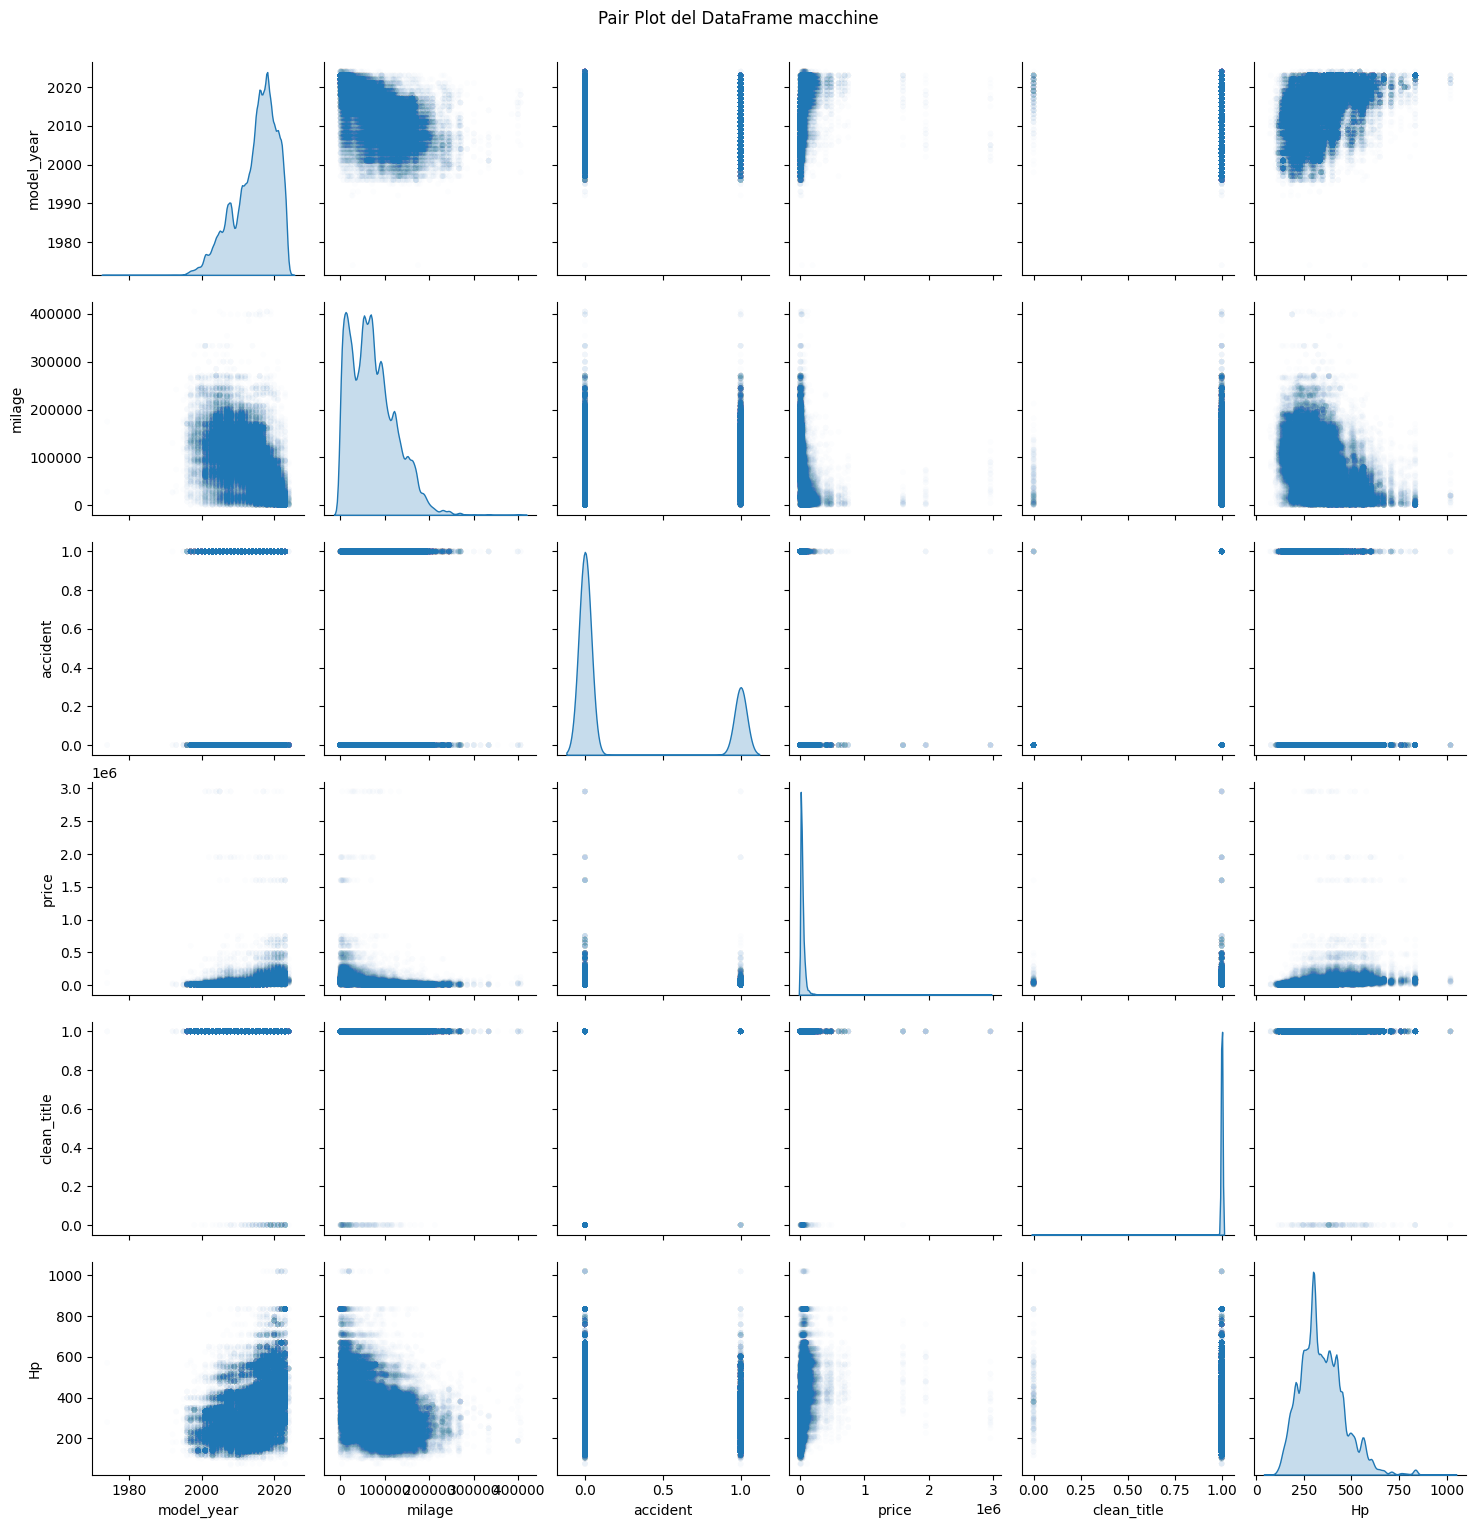

In [ ]:
# Selecting relevant features
sns.pairplot(macchine_data[lista], diag_kind='kde', plot_kws={'linewidth': 0, 'size': 0.1, 'alpha': 0.01})
plt.suptitle('Pair Plot del DataFrame macchine', y=1.02)
plt.show()

In [ ]:
macchine_data["accident"]

0         0
1         1
2         0
3         0
4         0
         ..
188527    0
188528    0
188529    1
188530    0
188532    0
Name: accident, Length: 153653, dtype: int64

Text(0, 0.5, 'Prezzo')

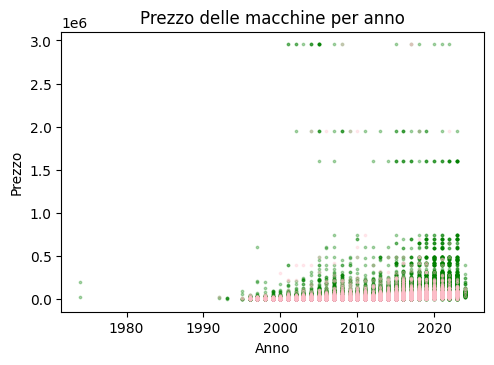

In [ ]:
fig = plt.figure(figsize= (12, 8))

ax1 = fig.add_subplot(2,2,1)
ax1.scatter(macchine_data[macchine_data["accident"] == 0]["model_year"], macchine_data[macchine_data["accident"] == 0]['price'], s = 3, color='green',alpha = 0.3)
ax1.scatter(macchine_data[macchine_data["accident"] == 1]["model_year"], macchine_data[macchine_data["accident"] == 1]['price'], s = 3, color='pink',alpha = 0.3)


# tick_positions = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
# tick_positions = [x*1e6 for x in tick_positions]
# tick_labels = ['0', '500k', '1kk', '1.5kk', '2.0kk', '2.5kk', '3kk']
# ax1.set_yticks(tick_positions, tick_labels)
ax1.set_title('Prezzo delle macchine per anno')
ax1.set_xlabel('Anno')
ax1.set_ylabel('Prezzo')
# ax2 = fig.add_subplot(2,2,2)
# ax2.scatter(np.log10(macchine_data['price']), macchine_data['kilometri'], edgecolor='black')
# tick_positions = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
# tick_labels = ['3.2k', '10k', '31.6k', '100k', '316k', '1kk', '3kk']
# ax2.set_xticks(tick_positions, tick_labels)
# ax2.set_xlabel('Prezzo')
# ax2.set_ylabel('Numero di macchine')
# ax2.set_title('Distribuzione del prezzo delle macchine')

In [ ]:
def check_vintage(riga):
    if riga < 2000:
        return True
    else:
        return False

In [ ]:
macchine_data['Vintage'] = macchine_data['model_year'].apply(check_vintage)

In [ ]:
macchine_data['Vintage'] = macchine_data['Vintage'].map({True: 1, False: 0})

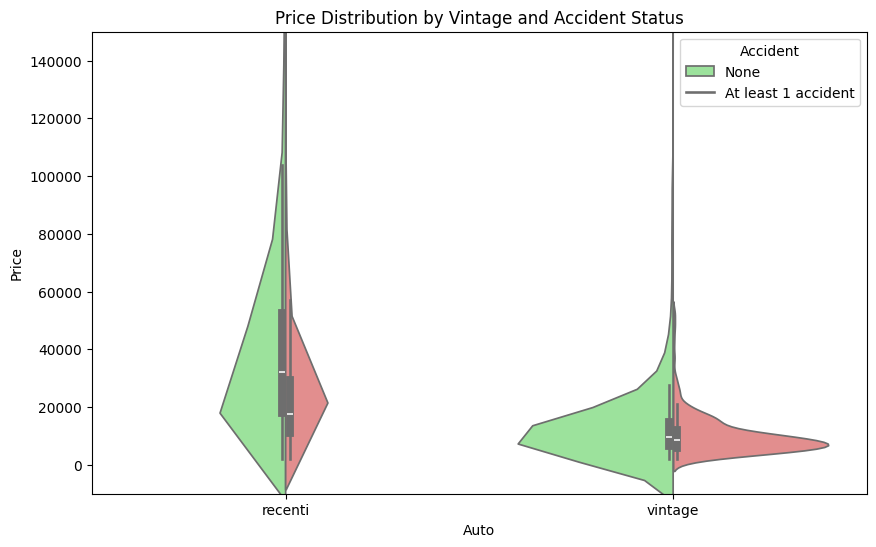

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()

#set the y limits
plt.xticks(ticks=[0, 1], labels=['recenti', 'vintage'])
sns.violinplot(x='Vintage', y='price', hue='accident', data=macchine_data, split=True, palette={1:'lightcoral', 0:'lightgreen'},ax= ax1)
ax1.set_ylim(-10000, 150000)
ax1.set_title('Price Distribution by Vintage and Accident Status')
ax1.set_xlabel('Auto')
ax1.set_ylabel('Price')
ax1.legend(title='Accident', labels=['None', 'At least 1 accident'])


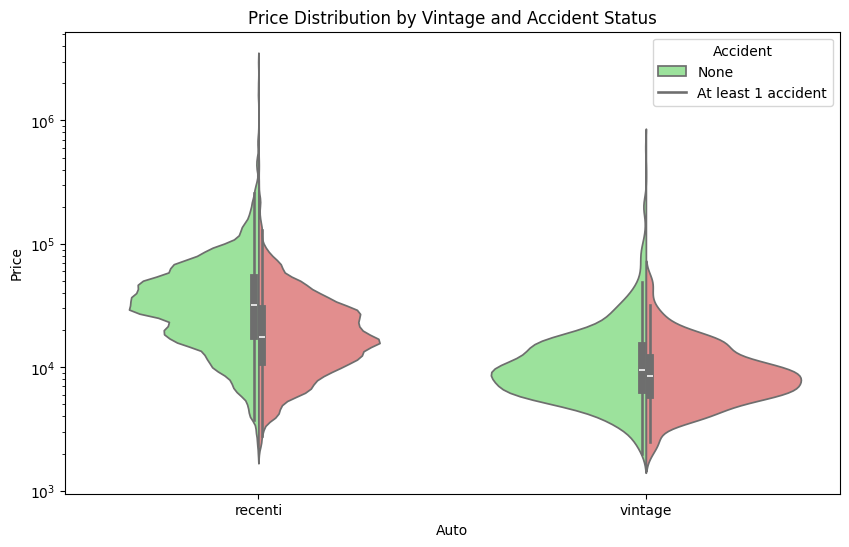

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()

#set the y limits

plt.xticks(ticks=[0, 1], labels=['recenti', 'vintage'])
sns.violinplot(x='Vintage', y='price', hue='accident', data=macchine_data, split=True, palette={1:'lightcoral', 0:'lightgreen'},ax= ax1, log_scale=10)
ax1.set_title('Price Distribution by Vintage and Accident Status')
ax1.set_xlabel('Auto')
ax1.set_ylabel('Price')
ax1.legend(title='Accident', labels=['None', 'At least 1 accident'])

In [ ]:
def auto_sportiva(riga):
    if riga > 300:
        return True
    else:
        return False

In [ ]:
macchine_data['Sportiva'] = macchine_data['Hp'].apply(auto_sportiva)

In [ ]:
macchine_data['Sportiva'] = macchine_data['Sportiva'].map({True: 1, False: 0})

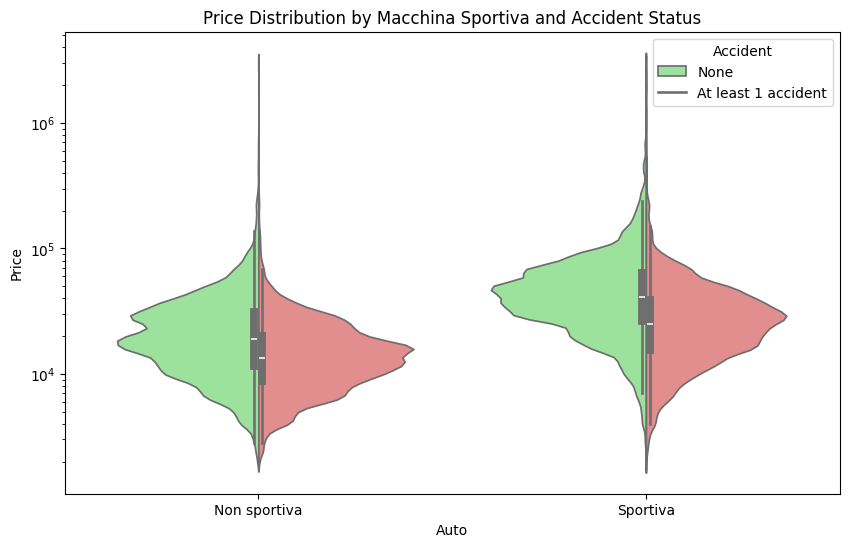

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()

plt.xticks(ticks=[0, 1], labels=['Non sportiva', 'Sportiva'])
sns.violinplot(x='Sportiva', y='price', hue='accident', data=macchine_data, split=True, palette={1:'lightcoral', 0:'lightgreen'},ax= ax1, log_scale=10)
ax1.set_title('Price Distribution by Macchina Sportiva and Accident Status')
ax1.set_xlabel('Auto')
ax1.set_ylabel('Price')
ax1.legend(title='Accident', labels=['None', 'At least 1 accident'])

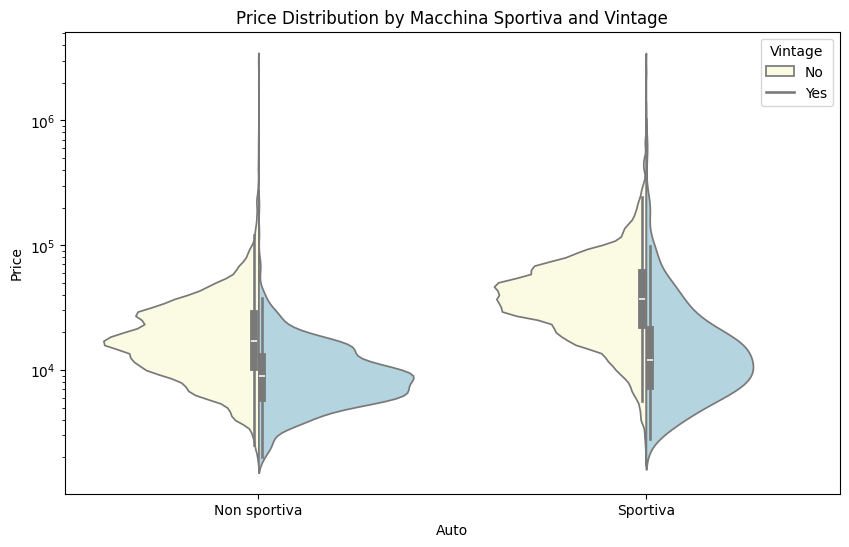

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()

plt.xticks(ticks=[0, 1], labels=['Non sportiva', 'Sportiva'])
sns.violinplot(x='Sportiva', y='price', hue='Vintage', data=macchine_data, split=True, palette={0:'lightyellow', 1:'lightblue'},ax= ax1, log_scale=10)
ax1.set_title('Price Distribution by Macchina Sportiva and Vintage')
ax1.set_xlabel('Auto')
ax1.set_ylabel('Price')
ax1.legend(title='Vintage', labels=['No', 'Yes'])

In [ ]:
# #creare colonna per kilometri partendo dalla colonna miglia
# macchine_data['Kilometri'] = macchine_data['milage'] * 1.60934


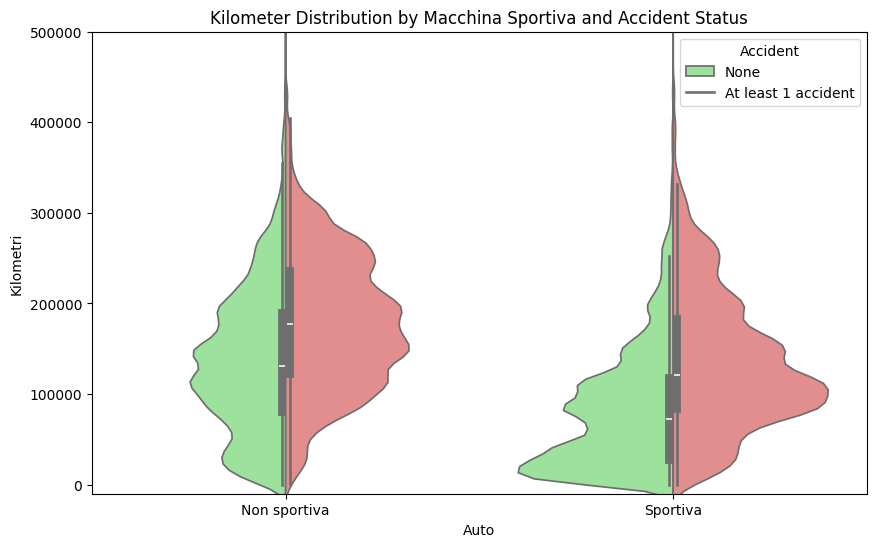

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()

plt.xticks(ticks=[0, 1], labels=['Non sportiva', 'Sportiva'])
sns.violinplot(x='Sportiva', y='Kilometri', hue='accident', data=macchine_data, split=True, palette={0:'lightgreen', 1:'lightcoral'},ax= ax1)
ax1.set_ylim(-10000, 500000)
ax1.set_title('Kilometer Distribution by Macchina Sportiva and Accident Status')
ax1.set_xlabel('Auto')
ax1.set_ylabel('Kilometri')
ax1.legend(title='Accident', labels=['None', 'At least 1 accident'])

In [ ]:
macchine_data['Kilometri'].describe()

count    153653.00000
mean     116431.58474
std       81290.03895
min         160.93400
25%       48038.79900
50%      106055.50600
75%      165940.65674
max      651782.70000
Name: Kilometri, dtype: float64